# Energy Trends

In this notebook a study on energy data is performed. The data was obtained from UNdata.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./all_energy_statistics.csv')


Let's start by taking a look at the dataframe first rows

In [51]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


We see that we have only 7 columns, of which most of them are categorical. Let's see how many unique values there are for commodity transactions.

In [52]:
unique_transactions = df["commodity_transaction"].unique()
unique_transactions.shape


(2452,)

Wow that's a huge number of different values! Perhaps we can take a look at the number of unique values at "category".

In [53]:
unique_categories = df["category"].unique()
unique_categories.shape

(71,)

Ok, that's still a big number, but much more manageable. So let's see how those values look like:

In [54]:
unique_categories[:71]

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

Right, so essentially each category corresponds to a different energy source. Now since there are still a lot of categories, we probably want to focus on the most relevant ones. That is the ones with the largest quantities.
We can do this by looping through each category, and obtaining the top 10.

In [55]:
categories_total = pd.Series(np.zeros(71),unique_categories) 
for category in unique_categories:
    df_category = df[df["category"] == category]
    categories_total[category]=df_category["quantity"].sum()
categories_total.sort_values().tail(10)

blast_furnace_gas                                              3.629262e+08
electricity_net_installed_capacity_of_electric_power_plants    4.054776e+08
other_vegetal_material_and_residues                            9.819898e+08
heat                                                           2.870173e+09
total_electricity                                              3.599469e+09
peat                                                           3.911019e+09
conventional_crude_oil                                         6.929002e+09
brown_coal                                                     3.882408e+10
hard_coal                                                      7.170099e+10
natural_gas_including_lng                                      8.619686e+10
dtype: float64

In [56]:
df_browncoal = df[df['category'] == 'brown_coal']
df_browncoal_production = df_browncoal[df_browncoal['commodity_transaction'] == 'Brown coal - production']
total_browncoal_production = df_browncoal_production.groupby('year').sum()['quantity']

In [57]:
df_hardcoal = df[df['category'] == 'hard_coal']
df_hardcoal_production = df_hardcoal[df_hardcoal['commodity_transaction'] == 'Hard coal - production']
total_hardcoal_production = df_hardcoal_production.groupby('year').sum()['quantity']

In [58]:
df_crudeoil = df[df['category'] == 'conventional_crude_oil']
df_crudeoil_production = df_crudeoil[df_crudeoil['commodity_transaction'] == 'Conventional crude oil - production']
total_crudeoil_production = df_crudeoil_production.groupby('year').sum()['quantity']

In [59]:
df_shaleoil = df[df['category'] == 'oil_shale_oil_sands']
df_shaleoil_production = df_shaleoil[df_shaleoil['commodity_transaction'] == 'Oil shale - Production']
total_shaleoil_production = df_shaleoil_production.groupby('year').sum()['quantity']

In [60]:
df_naturalgas = df[df['category'] == 'natural_gas_including_lng']
df_naturalgas_production = df_naturalgas[df_naturalgas['commodity_transaction'] == 'Natural gas (including LNG) - production']
total_naturalgas_production = df_naturalgas_production.groupby('year').sum()['quantity']

In [61]:
df_uranium = df[df['category'] == 'uranium']
df_uranium_production = df_uranium[df_uranium['commodity_transaction'] == 'Uranium - production']
total_uranium_production = df_uranium_production.groupby('year').sum()['quantity']

In [62]:
df_solar_production = df[df['category'] == 'solar_electricity']
#df_solar_production = df_solar[df_solar['commodity_transaction'] == 'Solar electricity - production']
total_solar_production = df_solar_production.groupby('year').sum()['quantity']

In [63]:
df_wind_production = df[df['category'] == 'wind_electricity']
#df_wind_production = df_wind[df_wind['commodity_transaction'] == 'Wind electricity - production']
total_wind_production = df_wind_production.groupby('year').sum()['quantity']

In [64]:
df_hydro_production = df[df['category'] == 'hydro']
#df_wind_production = df_wind[df_wind['commodity_transaction'] == 'Wind electricity - production']
total_hydro_production = df_hydro_production.groupby('year').sum()['quantity']

In [65]:
df_nuclear_production = df[df['category'] == 'nuclear_electricity']
#df_wind_production = df_wind[df_wind['commodity_transaction'] == 'Wind electricity - production']
total_nuclear_production = df_nuclear_production.groupby('year').sum()['quantity']

In [66]:
df_thermal_production = df[df['category'] == 'thermal_electricity']
#df_wind_production = df_wind[df_wind['commodity_transaction'] == 'Wind electricity - production']
total_thermal_production = df_thermal_production.groupby('year').sum()['quantity']

In [67]:
df[(df['category'] == 'total_electricity')]['commodity_transaction'].unique()

array(['Electricity - Consumption by chemical and petrochemical',
       'Electricity - Consumption by commercial and public services',
       'Electricity - Consumption by construction',
       'Electricity - Consumption by food and tobacco',
       'Electricity - Consumption by households',
       'Electricity - Consumption by iron and steel',
       'Electricity - Consumption by machinery',
       'Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption by mining and quarrying',
       'Electricity - Consumption by non-ferrous metals',
       'Electricity - Consumption by non-metallic minerals',
       'Electricity - Consumption by other',
       'Electricity - Consumption by other manuf., const. and non-fuel ind.',
       'Electricity - Consumption by paper, pulp and print',
       'Electricity - Consumption by pipeline transport',
       'Electricity - Consumption by rail',
       'Electricity - Consumption by road',
     

In [68]:
#df_electricity_production = df[(df['category'] == 'total_electricity') & (df['commodity_transaction'] == 'Electricity - net production')]
df_electricity_production = df[(df['category'] == 'total_electricity') & (df['commodity_transaction'] == 'Electricity - Gross production')]
total_electricity_production = df_electricity_production.groupby('year').sum()['quantity']
df_electricity_production['commodity_transaction'].unique()
df_electricity_production[df_electricity_production['country_or_area'] == 'Greenland']

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
1104792,Greenland,Electricity - Gross production,2014,"Kilowatt-hours, million",579.9176,NaN,total_electricity
1104793,Greenland,Electricity - Gross production,2013,"Kilowatt-hours, million",568.1055,NaN,total_electricity
1104794,Greenland,Electricity - Gross production,2012,"Kilowatt-hours, million",573.9307,NaN,total_electricity
1104795,Greenland,Electricity - Gross production,2011,"Kilowatt-hours, million",565.3134,NaN,total_electricity
1104796,Greenland,Electricity - Gross production,2010,"Kilowatt-hours, million",533.1866,NaN,total_electricity
1104797,Greenland,Electricity - Gross production,2009,"Kilowatt-hours, million",573.1285,NaN,total_electricity
1104798,Greenland,Electricity - Gross production,2008,"Kilowatt-hours, million",387.9000,NaN,total_electricity
1104799,Greenland,Electricity - Gross production,2007,"Kilowatt-hours, million",388.9000,NaN,total_electricity
1104800,Greenland,Electricity - Gross production,2006,"Kilowatt-hours, million",383.1000,NaN,total_electricity
1104801,Greenland,Electricity - Gross production,2005,"Kilowatt-hours, million",355.1000,NaN,total_electricity


In [69]:
#df_solar['unit']
#total_solar_production
#df['unit'].unique()
df[df['unit']=='Kilowatt-hours, million']['category'].unique()
#df_solar[df_solar['commodity_transaction'] == 'Oil shale - production']

array(['falling_water', 'geothermal', 'hydro', 'nuclear_electricity',
       'solar_electricity', 'thermal_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity'], dtype=object)

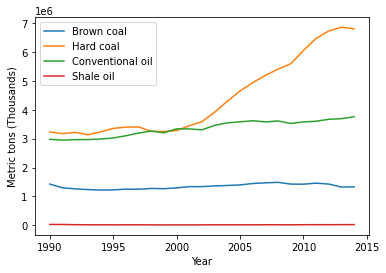

In [70]:
plt.plot(total_browncoal_production, label='Brown coal')
plt.plot(total_hardcoal_production, label='Hard coal')
plt.plot(total_crudeoil_production, label='Conventional oil')
plt.plot(total_shaleoil_production, label='Shale oil')
#plt.plot(total_naturalgas_production, label = 'Natural gas') # Units in TJ


plt.xlabel('Year')
plt.ylabel('Metric tons (Thousands)')
plt.legend()

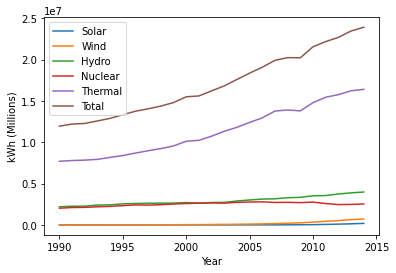

In [71]:
plt.plot(total_solar_production, label='Solar')
plt.plot(total_wind_production, label='Wind')
plt.plot(total_hydro_production, label='Hydro')
plt.plot(total_nuclear_production, label='Nuclear')
plt.plot(total_thermal_production, label='Thermal')
plt.plot(total_electricity_production, label='Total')


plt.xlabel('Year')
plt.ylabel('kWh (Millions)')
plt.legend()

In [72]:
list_of_countries = df['country_or_area'].unique()

solar_increase_bycountry = pd.DataFrame(columns=['country_or_area','quantity'])
solar_increase_bycountry.set_index('country_or_area')

for country in df['country_or_area'].unique():
    
    try:
        value = (df_solar_production[(df_solar_production['year']==2010) & 
                                    (df_solar_production['country_or_area']==country)]['quantity'].values \
                /df_electricity_production[(df_electricity_production['year']==2010) &
                                    (df_electricity_production['country_or_area']==country)]['quantity'].values \
                -df_solar_production[(df_solar_production['year']==1999) &
                                    (df_solar_production['country_or_area']==country)]['quantity'].values \
                /df_electricity_production[(df_electricity_production['year']==1999) &
                                    (df_electricity_production['country_or_area']==country)]['quantity'].values)
        
        solar_increase_bycountry=pd.concat([solar_increase_bycountry,pd.DataFrame({'country_or_area': country, 'quantity': value}, index=['country_or_area'])], axis=0)

    except:
        solar_increase_bycountry=pd.concat([solar_increase_bycountry,pd.DataFrame({'country_or_area': country, 'quantity': pd.NA}, index=['country_or_area'])], axis=0)


solar_increase_bycountry = solar_increase_bycountry.set_index('country_or_area')
print(solar_increase_bycountry.sort_values('quantity',ascending=False))
print(solar_increase_bycountry.notnull().sum())

                                          quantity
country_or_area                                   
Micronesia (Fed. States of)               0.026258
Spain                                     0.023750
Germany                                   0.018476
Italy                                     0.006246
Martinique                                0.004071
...                                            ...
Tuvalu                                         NaN
United States Virgin Is.                       NaN
Wallis and Futuna Is.                          NaN
Commonwealth of Independent States (CIS)       NaN
Antarctic Fisheries                            NaN

[243 rows x 1 columns]
quantity    21
dtype: int64


In [158]:
def create_df_rel_increase_by_country(df, category, list_of_countries, from_year, to_year):
    df_category = df[df['category'] == category]
    df_rel_increase = pd.DataFrame(columns=[])
    
    for country in list_of_countries:
    
        try:
            value = (df_category[(df_category['year']==to_year) & 
                                    (df_category['country_or_area']==country)]['quantity'].values \
                /df_electricity_production[(df_electricity_production['year']==to_year) &
                                    (df_electricity_production['country_or_area']==country)]['quantity'].values \
                -df_category[(df_category['year']==from_year) &
                                    (df_category['country_or_area']==country)]['quantity'].values \
                /df_electricity_production[(df_electricity_production['year']==from_year) &
                                    (df_electricity_production['country_or_area']==country)]['quantity'].values)
        
            df_rel_increase=pd.concat([df_rel_increase,pd.DataFrame({category + '_rel_inc_' + str(from_year) + '_' + str(to_year): value}, index=[country])], axis=0)

        except:
            df_rel_increase=pd.concat([df_rel_increase,pd.DataFrame({category + '_rel_inc_' + str(from_year) + '_' + str(to_year): pd.NA}, index=[country])], axis=0)
    
    return df_rel_increase    

In [157]:
def create_df_increase_by_country(df, category, list_of_countries, from_year, to_year):
    df_category = df[df['category'] == category]
    df_increase = pd.DataFrame(columns=[])
    
    for country in list_of_countries:
    
        try:
            value = (df_category[(df_category['year']==to_year) &
                                    (df_category['country_or_area']==country)]['quantity'].values \
                    -df_category[(df_category['year']==from_year) &
                                    (df_category['country_or_area']==country)]['quantity'].values)
                     
            df_increase=pd.concat([df_increase,pd.DataFrame({category + '_inc_' + str(from_year) + '_' + str(to_year): value}, index=[country])], axis=0)

        except:
            df_increase=pd.concat([df_increase,pd.DataFrame({category + '_inc_' + str(from_year) + '_' + str(to_year): pd.NA}, index=[country])], axis=0)
    
    return df_increase

In [75]:
categories = ['hydro','solar']
columns=['country_or_area']
print(columns + categories)

['country_or_area', 'hydro', 'solar']


In [76]:
def create_df_pool_by_country(df, categories, list_of_countries, year):
    
    df_pool = pd.DataFrame(columns = [])
    
    for category in categories:
        
        df_pool1 = pd.DataFrame(columns = [category])
        df_category = df[df['category'] == category]
                   
        for country in list_of_countries:
    
            try:
                value = df_category[(df_category['year']==year) &
                                    (df_category['country_or_area']==country)]['quantity'].values
                    
                df_pool1=pd.concat([df_pool1,pd.DataFrame({category: value}, index=[country])], axis=0)

            except:
                df_pool1=pd.concat([df_pool1,pd.DataFrame({category: pd.NA}, index=[country])],axis=0)
        
        df_pool = pd.concat([df_pool,df_pool1], axis=1)
    
    
    return df_pool

In [77]:
pool = ['solar_electricity','hydro','nuclear_electricity','thermal_electricity','wind_electricity','tide_wave_and_ocean_electricity']
df_pool = create_df_pool_by_country(df, pool, list_of_countries, 2014)
df_pool.loc['Greenland']

solar_electricity                       NaN
hydro                              396.3594
nuclear_electricity                     NaN
thermal_electricity                183.5582
wind_electricity                        NaN
tide_wave_and_ocean_electricity         NaN
Name: Greenland, dtype: float64

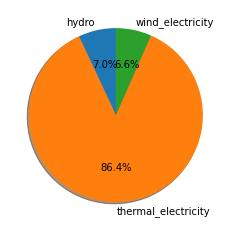

In [78]:
fig1, ax1 = plt.subplots()

df_pool_clean = df_pool.loc['Morocco'].dropna(axis=0)

#df_pool_clean

ax1.pie(df_pool_clean, labels=df_pool_clean.index, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

In [79]:
df[df['category'] == 'electricity_net_installed_capacity_of_electric_power_plants']['commodity_transaction'].unique()

array(['Electricity generating capacity - From other sources - Autoproducers',
       'Electricity generating capacity - From other sources - Main activity producers',
       'Electricity generating capacity - From other sources - Total',
       'Electricity generating capacity - Pumped hydro - Autoproducers',
       'Electricity generating capacity - Pumped hydro - Main activity producers',
       'Electricity generating capacity - Pumped hydro - Total',
       'Electricity generating capacity - Solar PV - Autoproducers',
       'Electricity generating capacity - Solar PV - Main activity producers',
       'Electricity generating capacity - Solar PV - Total',
       'Electricity generating capacity - Solar Thermal - Autoproducers',
       'Electricity generating capacity - Solar Thermal - Main activity producers',
       'Electricity generating capacity - Solar Thermal - Total',
       'Electricity - net installed capacity of electric power plants, public combustible fuels',
       'E

In [175]:
list_of_countries = df['country_or_area'].unique()
solar_increase_bycountry = create_df_increase_by_country(df, 'solar_electricity', list_of_countries, 2004, 2014)
print(solar_increase_bycountry.sort_values('solar_electricity_inc_2004_2014',axis=0,ascending=False))

                                          solar_electricity_inc_2004_2014
Germany                                                           35499.0
United States                                                     23638.0
Japan                                                             23317.0
Italy                                                             22277.0
Spain                                                             13617.0
...                                                                   ...
Tuvalu                                                                NaN
United States Virgin Is.                                              NaN
Wallis and Futuna Is.                                                 NaN
Commonwealth of Independent States (CIS)                              NaN
Antarctic Fisheries                                                   NaN

[243 rows x 1 columns]


In [176]:
list_of_countries = df['country_or_area'].unique()
solar_rel_increase_bycountry = create_df_rel_increase_by_country(df, 'solar_electricity', list_of_countries, 2004, 2014)
#print(solar_rel_increase_bycountry.sort_values('quantity',axis=0,ascending=False))
solar_rel_increase_bycountry

,solar_electricity_rel_inc_2004_2014
Austria,0.011719
Belgium,0.039651
Czechia,NaN
Finland,0.000094
France,0.010484
...,...
Tuvalu,NaN
United States Virgin Is.,NaN
Wallis and Futuna Is.,NaN
Commonwealth of Independent States (CIS),NaN


In [162]:
list_of_countries = df['country_or_area'].unique()
hydro_rel_increase_bycountry = create_df_rel_increase_by_country(df, 'hydro', list_of_countries, 2004, 2014)
print(hydro_rel_increase_bycountry.sort_values('hydro_rel_inc_2004_2014',axis=0,ascending=False))

                                          hydro_rel_inc_2004_2014
Cambodia                                                 0.568825
Sierra Leone                                             0.512501
Swaziland                                                0.240667
Lithuania                                                0.198515
Myanmar                                                  0.194282
...                                                           ...
Tuvalu                                                        NaN
United States Virgin Is.                                      NaN
Wallis and Futuna Is.                                         NaN
Commonwealth of Independent States (CIS)                      NaN
Antarctic Fisheries                                           NaN

[243 rows x 1 columns]


In [163]:
hydro_increase_bycountry = create_df_increase_by_country(df, 'hydro', list_of_countries, 2004, 2014)
print(hydro_increase_bycountry.sort_values('hydro_inc_2004_2014',axis=0,ascending=False))
print(hydro_increase_bycountry.notnull().sum())

                                          hydro_inc_2004_2014
China                                                710793.0
Brazil                                                52642.0
India                                                 44630.0
Viet Nam                                              43662.0
Canada                                                41628.0
...                                                       ...
Tuvalu                                                    NaN
United States Virgin Is.                                  NaN
Wallis and Futuna Is.                                     NaN
Commonwealth of Independent States (CIS)                  NaN
Antarctic Fisheries                                       NaN

[243 rows x 1 columns]
hydro_inc_2004_2014    149
dtype: int64


In [165]:
wind_rel_increase_bycountry = create_df_rel_increase_by_country(df, 'wind_electricity', list_of_countries, 2004, 2014)
print(wind_rel_increase_bycountry.sort_values('wind_electricity_rel_inc_2004_2014',axis=0,ascending=False))
print(wind_rel_increase_bycountry.notnull().sum())

                                          wind_electricity_rel_inc_2004_2014
Falkland Is. (Malvinas)                                             0.307089
Denmark                                                             0.243594
Portugal                                                            0.211275
Ireland                                                             0.169716
Lithuania                                                           0.145274
...                                                                      ...
Tuvalu                                                                   NaN
United States Virgin Is.                                                 NaN
Wallis and Futuna Is.                                                    NaN
Commonwealth of Independent States (CIS)                                 NaN
Antarctic Fisheries                                                      NaN

[243 rows x 1 columns]
wind_electricity_rel_inc_2004_2014    63
dtype: int6

In [166]:
wind_increase_bycountry = create_df_increase_by_country(df, 'wind_electricity', list_of_countries, 2004, 2014)
print(wind_increase_bycountry.sort_values('wind_electricity_inc_2004_2014',axis=0,ascending=False))
print(wind_increase_bycountry.notnull().sum())

                                          wind_electricity_inc_2004_2014
United States                                                   169601.0
Spain                                                            36313.0
Germany                                                          31848.0
United Kingdom                                                   30080.0
India                                                            22762.0
...                                                                  ...
Tuvalu                                                               NaN
United States Virgin Is.                                             NaN
Wallis and Futuna Is.                                                NaN
Commonwealth of Independent States (CIS)                             NaN
Antarctic Fisheries                                                  NaN

[243 rows x 1 columns]
wind_electricity_inc_2004_2014    63
dtype: int64


In [167]:
nuclear_rel_increase_bycountry = create_df_rel_increase_by_country(df, 'nuclear_electricity', list_of_countries, 2004, 2014)
print(nuclear_rel_increase_bycountry.sort_values('nuclear_electricity_rel_inc_2004_2014',axis=0,ascending=False))
print(nuclear_rel_increase_bycountry.notnull().sum())

                                          nuclear_electricity_rel_inc_2004_2014
Hungary                                                                0.179328
Finland                                                                0.081631
Romania                                                                0.079585
Czechia                                                                0.040363
Pakistan                                                               0.015695
...                                                                         ...
Tuvalu                                                                      NaN
United States Virgin Is.                                                    NaN
Wallis and Futuna Is.                                                       NaN
Commonwealth of Independent States (CIS)                                    NaN
Antarctic Fisheries                                                         NaN

[243 rows x 1 columns]
nuclear_electric

In [168]:
nuclear_increase_bycountry = create_df_increase_by_country(df, 'nuclear_electricity', list_of_countries, 2004, 2014)
print(nuclear_increase_bycountry.sort_values('nuclear_electricity_inc_2004_2014',axis=0,ascending=False))
print(nuclear_increase_bycountry.notnull().sum())

                                          nuclear_electricity_inc_2004_2014
China                                                               82069.0
Russian Federation                                                  36050.0
Korea, Republic of                                                  25692.0
India                                                               19091.0
Canada                                                              17291.0
...                                                                     ...
Tuvalu                                                                  NaN
United States Virgin Is.                                                NaN
Wallis and Futuna Is.                                                   NaN
Commonwealth of Independent States (CIS)                                NaN
Antarctic Fisheries                                                     NaN

[243 rows x 1 columns]
nuclear_electricity_inc_2004_2014    30
dtype: int64


In [169]:
thermal_rel_increase_bycountry = create_df_rel_increase_by_country(df, 'thermal_electricity', list_of_countries, 2004, 2014)
print(thermal_rel_increase_bycountry.sort_values('thermal_electricity_rel_inc_2004_2014',axis=0,ascending=False))
print(thermal_rel_increase_bycountry.notnull().sum())
thermal_rel_increase_bycountry.loc['Greenland']

                                          thermal_electricity_rel_inc_2004_2014
United Rep. of Tanzania                                                0.395084
Haiti                                                                  0.388195
Lithuania                                                              0.367886
Congo                                                                  0.284108
Latvia                                                                 0.258202
...                                                                         ...
Sint Maarten (Dutch part)                                                   NaN
Yemen Arab Rep. (former)                                                    NaN
Liechtenstein                                                               NaN
Commonwealth of Independent States (CIS)                                    NaN
Antarctic Fisheries                                                         NaN

[243 rows x 1 columns]
thermal_electric

thermal_electricity_rel_inc_2004_2014   -0.11387
Name: Greenland, dtype: float64

In [170]:
thermal_increase_bycountry = create_df_increase_by_country(df, 'thermal_electricity', list_of_countries, 2004, 2014)
print(thermal_increase_bycountry.sort_values('thermal_electricity_inc_2004_2014',axis=0,ascending=False))
print(thermal_increase_bycountry.notnull().sum())
thermal_increase_bycountry.loc['Greenland']

                                          thermal_electricity_inc_2004_2014
China                                                             2473061.2
India                                                              551384.0
Japan                                                              235644.0
Saudi Arabia                                                       151930.0
Korea, Republic of                                                 150000.0
...                                                                     ...
Sint Maarten (Dutch part)                                               NaN
Yemen Arab Rep. (former)                                                NaN
Liechtenstein                                                           NaN
Commonwealth of Independent States (CIS)                                NaN
Antarctic Fisheries                                                     NaN

[243 rows x 1 columns]
thermal_electricity_inc_2004_2014    219
dtype: int64


thermal_electricity_inc_2004_2014    38.5582
Name: Greenland, dtype: float64

In [139]:
thermal_increase_bycountry

,quantity
country_or_area,
Austria,-8267.000
Belgium,-6999.000
Czechia,-5297.000
Finland,-17953.000
France,-26357.000
...,...
Tuvalu,1.000
United States Virgin Is.,-283.583
Wallis and Futuna Is.,-0.851


20828.606


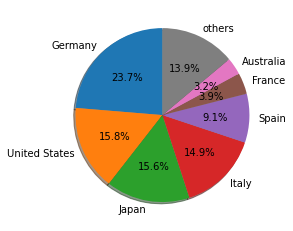

In [177]:
fig1, ax1 = plt.subplots()

solar_increase_bycountry_clean = solar_increase_bycountry.dropna(axis=0)
solar_increase_bycountry_sorted = solar_increase_bycountry_clean['solar_electricity_inc_2004_2014'].sort_values(ascending=False)[:7]
print(solar_increase_bycountry_clean['solar_electricity_inc_2004_2014'].sort_values(ascending=False)[7:].values.sum())
solar_increase_bycountry_sorted=solar_increase_bycountry_sorted.append(pd.Series({'others':solar_increase_bycountry_clean['solar_electricity_inc_2004_2014'].sort_values(ascending=False)[7:].values.sum()}))

ax1.pie(solar_increase_bycountry_sorted, labels=solar_increase_bycountry_sorted.index, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

In [91]:
is_co2market = pd.DataFrame(np.full((len(list_of_countries),17),False), columns=range(1998,2015), index=list_of_countries)

EU_preETS = ['Austria','Belgium','Denmark','Finland','France','Germany','Greece',
               'Ireland','Italy','Luxembourg','Netherlands','Portugal','Spain','Sweden',
              'Cyprus','Czechia','Estonia','Hungary','Latvia','Lithuania','Malta','Poland',
               'Slovakia','Slovenia']

countries_2003 = ['Australia']
countries_2007 = ['Bulgaria','Romania','Canada']
countries_2008 = ['New Zealand']
countries_2009 = ['United States']
countries_2010 = ['Japan']

EU_2013 = ['Croatia']

for country in EU_preETS:
    is_co2market.loc[country,range(2005,2015)]=np.full(10,True)
    
for country in countries_2003:
    is_co2market.loc[country,range(2003,2015)]=np.full(12,True)

for country in countries_2007:
    is_co2market.loc[country,range(2007,2015)]=np.full(8,True)
    
for country in countries_2008:
    is_co2market.loc[country,range(2008,2015)]=np.full(7,True)
    
for country in countries_2009:
    is_co2market.loc[country,range(2009,2015)]=np.full(6,True)
    
for country in countries_2010:
    is_co2market.loc[country,range(2010,2015)]=np.full(5,True)


for country in EU_2013:
    is_co2market.loc[country,range(2013,2015)]=True
    
is_co2market

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Austria,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
Belgium,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
Czechia,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
Finland,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
France,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
United States Virgin Is.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Wallis and Futuna Is.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Commonwealth of Independent States (CIS),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


That makes more sense, however we need to pay attention at the units. Total electricity will have different units than natural_gas. Therefore, let's focus on the following categories:
- natural_gas_including_lng
- hard_coal
- brown_coal
- conventional_crude_oil
- oil_shale_oil_sands

In [92]:
df_population = pd.read_csv('./Population.csv')

In [93]:
#df_population['Country or Area'].unique()
#df['country_or_area'].unique()
df_population.head()

,Series Name,Series Code,Country Name,Country Code,2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,22600774,23680871,24726689,25654274,26433058,27100542,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,..
1,"Population, total",SP.POP.TOTL,Africa Eastern and Southern,AFE,419223717,430246635,441630149,453404076,465581372,478166911,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,..
2,"Population, total",SP.POP.TOTL,Africa Western and Central,AFW,281842480,289469530,297353098,305520588,313985474,322741656,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,..
3,"Population, total",SP.POP.TOTL,Albania,ALB,3051010,3039616,3026939,3011487,2992547,2970017,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,..
4,"Population, total",SP.POP.TOTL,Algeria,DZA,31855110,32264159,32692153,33149720,33641007,34166976,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,..


In [94]:
df_population['Country Name'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominica

In [95]:
df_population[(df_population['Country Name']=='China')]['2002 [YR2002]'].values[0]

'1280400000'

In [121]:
population_bycountry = pd.DataFrame(columns=[])

for country in df_population['Country Name'].unique():

    try:
        value = df_population[df_population['Country Name']==country]['2020 [YR2020]'].values[0]
        population_bycountry=pd.concat([population_bycountry,pd.DataFrame({'population': value}, index=[country])], axis=0)

    except:
        population_bycountry=pd.concat([population_bycountry,pd.DataFrame({'population': pd.NA}, index=[country])], axis=0)


#population_bycountry = population_bycountry.set_index('country_or_area'), 
#print(population_bycountry.sort_values('quantity',axis=0,ascending=False))
#print(population_bycountry.notnull().sum())
population_bycountry

,population
Afghanistan,38928341
Africa Eastern and Southern,677243299
Africa Western and Central,458803476
Albania,2837743
Algeria,43851043
...,...
World,7761620146
"Yemen, Rep.",29825968
Zambia,18383956
Zimbabwe,14862927


In [127]:
def create_df_population_inc_by_country(df, from_year, to_year):
    
    population_inc_bycountry = pd.DataFrame(columns=[])

    for country in df_population['Country Name'].unique():

        try:
            value = int(df_population[df_population['Country Name']==country][str(to_year) + ' [YR' + str(to_year) + ']'].values[0]) -\
                    int(df_population[df_population['Country Name']==country][str(from_year) + ' [YR' + str(from_year) + ']'].values[0])
                                                                           
            population_inc_bycountry=pd.concat([population_inc_bycountry,pd.DataFrame({'population_inc_' + str(from_year) + '_' + str(to_year): value}, index=[country])], axis=0)

        except:
        #    print('except ' + country)
            population_inc_bycountry=pd.concat([population_inc_bycountry,pd.DataFrame({'population_inc_' + str(from_year) + '_' + str(to_year): pd.NA}, index=[country])], axis=0)
            
    return population_inc_bycountry


In [124]:
def create_df_population_rel_inc_by_country(df, from_year, to_year):
    
    population_inc_bycountry = pd.DataFrame(columns=[])
    
    for country in df_population['Country Name'].unique():

        try:
            value = (int(df_population[df_population['Country Name']==country][str(to_year) + ' [YR' + str(to_year) + ']'].values[0]) -\
                    int(df_population[df_population['Country Name']==country][str(from_year) + ' [YR' + str(from_year) + ']'].values[0]))\
                   /int(df_population[df_population['Country Name']==country][str(from_year) + ' [YR' + str(from_year) + ']'].values[0])
                                                                           
            population_inc_bycountry=pd.concat([population_inc_bycountry,pd.DataFrame({'population_rel_inc_' + str(from_year) + '_' + str(to_year): value}, index=[country])], axis=0)

        except:
        #    print('except ' + country)
            population_inc_bycountry=pd.concat([population_inc_bycountry,pd.DataFrame({'population_rel_inc_' + str(from_year) + '_' + str(to_year): pd.NA}, index=[country])], axis=0)
            
    return population_inc_bycountry

In [195]:
population_increase_bycountry = create_df_population_inc_by_country(df_population, 2004, 2014)
population_increase_bycountry

,population_inc_2004_2014
Afghanistan,8644115
Africa Eastern and Southern,136445224
Africa Western and Central,93529881
Albania,-137835
Algeria,6231535
...,...
World,830319322
"Yemen, Rep.",6283392
Zambia,3849152
Zimbabwe,1566799


In [196]:
population_rel_increase_bycountry = create_df_population_rel_inc_by_country(df_population, '2004', '2014')
population_rel_increase_bycountry

,population_rel_inc_2004_2014
Afghanistan,0.349586
Africa Eastern and Southern,0.308958
Africa Western and Central,0.314541
Albania,-0.045536
Algeria,0.190613
...,...
World,0.129101
"Yemen, Rep.",0.321564
Zambia,0.333241
Zimbabwe,0.130350


In [192]:
is_co2market[2011]

Austria                                      True
Belgium                                      True
Czechia                                      True
Finland                                      True
France                                       True
                                            ...  
Tuvalu                                      False
United States Virgin Is.                    False
Wallis and Futuna Is.                       False
Commonwealth of Independent States (CIS)    False
Antarctic Fisheries                         False
Name: 2011, Length: 243, dtype: bool

In [287]:
df_all = population_bycountry.join(population_rel_increase_bycountry)

list_data = [
    #population_bycountry,
    #pop_rel_increase_2004_2014,
    #population_rel_increase_bycountry,
    is_co2market[2011],
    solar_increase_bycountry,
    solar_rel_increase_bycountry,
    thermal_increase_bycountry,
    thermal_rel_increase_bycountry,
    hydro_increase_bycountry,
    hydro_rel_increase_bycountry,
    wind_increase_bycountry,
    wind_rel_increase_bycountry,
    nuclear_increase_bycountry,
    nuclear_rel_increase_bycountry
]

for data in list_data:
    
    df_all = df_all.join(data)
    
df_all

#df_all=pop_rel_increase_2004_2014.join(is_co2market[2011])

#df_all=df_all.join(population_bycountry)

,population,population_rel_inc_2004_2014,2011,solar_electricity_inc_2004_2014,solar_electricity_rel_inc_2004_2014,thermal_electricity_inc_2004_2014,thermal_electricity_rel_inc_2004_2014,hydro_inc_2004_2014,hydro_rel_inc_2004_2014,wind_electricity_inc_2004_2014,wind_electricity_rel_inc_2004_2014,nuclear_electricity_inc_2004_2014,nuclear_electricity_rel_inc_2004_2014
Afghanistan,38928341,0.349586,False,NaN,NaN,-61.0,-0.128877,330.30,0.128877,NaN,NaN,NaN,NaN
Africa Eastern and Southern,677243299,0.308958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Western and Central,458803476,0.314541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2837743,-0.045536,False,NaN,NaN,NaN,NaN,-741.57,0.016730,NaN,NaN,NaN,NaN
Algeria,43851043,0.190613,False,NaN,NaN,32989.0,0.004078,3.00,-0.004078,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,7761620146,0.129101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",29825968,0.321564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,18383956,0.333241,False,NaN,NaN,363.0,0.022845,5582.00,-0.022845,NaN,NaN,NaN,NaN
Zimbabwe,14862927,0.130350,False,NaN,NaN,374.0,0.024151,-70.00,-0.024151,NaN,NaN,NaN,NaN


In [288]:
df_all=df_all.rename(columns={2011: 'is_co2market_2011'})

In [289]:
df_all=df_all.dropna(subset=['thermal_electricity_inc_2004_2014'], axis=0)
df_all.notna().sum()

population                               173
population_rel_inc_2004_2014             172
is_co2market_2011                        173
solar_electricity_inc_2004_2014           25
solar_electricity_rel_inc_2004_2014       25
thermal_electricity_inc_2004_2014        173
thermal_electricity_rel_inc_2004_2014    173
hydro_inc_2004_2014                      122
hydro_rel_inc_2004_2014                  122
wind_electricity_inc_2004_2014            53
wind_electricity_rel_inc_2004_2014        53
nuclear_electricity_inc_2004_2014         26
nuclear_electricity_rel_inc_2004_2014     26
dtype: int64

In [290]:
columns_inc_renewable = [
    'solar_electricity_inc_2004_2014',
    'hydro_inc_2004_2014',
    'wind_electricity_inc_2004_2014'
]

columns_inc_non_renewable = [
    'thermal_electricity_inc_2004_2014',
    'nuclear_electricity_inc_2004_2014'
]

columns_rel_inc_renewable = [
    'solar_electricity_rel_inc_2004_2014',
    'hydro_rel_inc_2004_2014',
    'wind_electricity_rel_inc_2004_2014'
]

columns_rel_inc_non_renewable = [
    'thermal_electricity_rel_inc_2004_2014',
    'nuclear_electricity_rel_inc_2004_2014'
]

#df_all['renewable_inc_2004_2014'] = df_all[columns_inc_renewable].sum(axis=1)

#df_all['non_renewable_inc_2004_2014'] = df_all[columns_inc_non_renewable].sum(axis=1)

df_all['renewable_rel_inc_2004_2014'] = df_all[columns_rel_inc_renewable].sum(axis=1)

#df_all['non_renewable_rel_inc_2004_2014'] = df_all[columns_rel_inc_non_renewable].sum(axis=1)



df_all=df_all.drop(columns_inc_renewable, axis=1)
df_all=df_all.drop(columns_inc_non_renewable, axis=1)
df_all=df_all.drop(columns_rel_inc_renewable, axis=1)
df_all=df_all.drop(columns_rel_inc_non_renewable, axis=1)


In [291]:
df_all

,population,population_rel_inc_2004_2014,is_co2market_2011,renewable_rel_inc_2004_2014
Afghanistan,38928341,0.349586,False,0.128877
Algeria,43851043,0.190613,False,-0.004078
American Samoa,55197,-0.065227,False,0.000000
Andorra,77265,0.038859,False,-0.095040
Angola,32866268,0.436271,False,-0.249499
...,...,...,...,...
Uruguay,3473727,0.023770,False,-0.068531
Uzbekistan,34232050,0.189193,False,0.033338
Vanuatu,307150,0.292789,False,0.075081
Zambia,18383956,0.333241,False,-0.022845


In [292]:
response_col = 'renewable_rel_inc_2004_2014'
test_size = 0.3
rand_state=24
df_all_clean= df_all.dropna()
X = df_all_clean.drop(response_col, axis=1)
y = df_all_clean['renewable_rel_inc_2004_2014']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=rand_state)
lm_model = LinearRegression(normalize = True)
#X_train[X_train['population_rel_inc_2004_2014'].isna()]
#X_train.isna().sum()
lm_model.fit(X_train, y_train)
y_train_pred = lm_model.predict(X_train)
#print(y_train_pred)
X_train
y_test_pred = lm_model.predict(X_test)
test_score = r2_score(y_test,y_test_pred)
train_score = r2_score(y_train,y_train_pred)

In [293]:
test_score

0.10745278060853114

In [294]:
train_score

0.10943189839932399

In [296]:
X_train.columns

Index(['population', 'population_rel_inc_2004_2014', 'is_co2market_2011'], dtype='object')

In [295]:
lm_coefs = lm_model.coef_

array([ 4.20161655e-12, -7.28500876e-05,  9.49912343e-02])

In [322]:
lm_model.coef_[0]*X['population'].values.astype(int).max()

0.005928184160594415

In [321]:
lm_model.coef_[1]*X['population_rel_inc_2004_2014'].values.astype(int).max()

-0.0001457001751798465

In [320]:
lm_model.coef_[2]*X['is_co2market_2011'].values.astype(int).max()

0.09499123432508938

In [8]:
import re

In [9]:
categories_df = pd.DataFrame(data=categories_total)
is_coal=np.full(71,True,dtype=bool)
for i, category in enumerate(unique_categories):
    is_coal[i]=re.search("coal",unique_categories[i])

print(categories_df[is_coal])

    

                                  0
brown_coal_briquettes  1.947066e+06
brown_coal             3.882408e+10
charcoal               6.952426e+06
coal_tar               3.527346e+05
coking_coal            3.818429e+07
hard_coal              7.170099e+10
other_bituminous_coal  1.634249e+08
other_coal_products    2.920547e+01
sub_bituminous_coal    5.816022e+07


This gives us all the categories for coal. Now we'll do the same for oil, gas,

In [20]:
is_oil = np.full(71,True,dtype=bool)
for i, category in enumerate(unique_categories):
    is_oil[i]=re.search("_oil",unique_categories[i])
    
print(categories_df[is_oil])

                                     0
conventional_crude_oil    6.929002e+09
fuel_oil                  8.857298e+07
gas_oil_diesel_oil        1.922951e+08
oil_shale_oil_sands       1.931684e+06
other_oil_products_n_e_c  1.323366e+07


# 